## Plots for matura arbeit

### Setup

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import re

plt.style.use("seaborn-v0_8-whitegrid")

In [17]:
files = glob.glob("data/**/*.csv", recursive=True)
files

['data\\base\\cfg_base_run_1.csv',
 'data\\base\\cfg_base_run_10.csv',
 'data\\base\\cfg_base_run_2.csv',
 'data\\base\\cfg_base_run_3.csv',
 'data\\base\\cfg_base_run_4.csv',
 'data\\base\\cfg_base_run_5.csv',
 'data\\base\\cfg_base_run_6.csv',
 'data\\base\\cfg_base_run_7.csv',
 'data\\base\\cfg_base_run_8.csv',
 'data\\base\\cfg_base_run_9.csv',
 'data\\ga_only\\cfg_ga_only_run_1.csv',
 'data\\ga_only\\cfg_ga_only_run_10.csv',
 'data\\ga_only\\cfg_ga_only_run_2.csv',
 'data\\ga_only\\cfg_ga_only_run_3.csv',
 'data\\ga_only\\cfg_ga_only_run_4.csv',
 'data\\ga_only\\cfg_ga_only_run_5.csv',
 'data\\ga_only\\cfg_ga_only_run_6.csv',
 'data\\ga_only\\cfg_ga_only_run_7.csv',
 'data\\ga_only\\cfg_ga_only_run_8.csv',
 'data\\ga_only\\cfg_ga_only_run_9.csv',
 'data\\gen_q_learning\\cfg_gen_q_learning_run_1.csv',
 'data\\gen_q_learning\\cfg_gen_q_learning_run_10.csv',
 'data\\gen_q_learning\\cfg_gen_q_learning_run_2.csv',
 'data\\gen_q_learning\\cfg_gen_q_learning_run_3.csv',
 'data\\gen_q_lea

### Dataframe loading

In [ ]:
data = []
for f in files:
    df = pd.read_csv(f)
    filename = os.path.basename(f)

    match = re.match(r"cfg_(.+)_run_(\d+)\.csv", filename)
    if match:
        cfg_name, run_id = match.groups()
    else:
        cfg_name, run_id = "unknown", None

    # df["config"] = cfg_name
    if run_id and int(run_id) <= 5:
        df["repetition"] = int(run_id) if run_id else None
        data.append(df)
df_all = pd.concat(data, ignore_index=True)
df_all

,config,log_type,mean_fitness_alive,n_alive,run_id,seed,time,wave,damage,dodged_bullets,enemy_id,fitness,lifespan,repetition
0,base,wave_snapshot,0.077083,2.0,1,613957,1.000000,1,NaN,NaN,NaN,NaN,NaN,1
1,base,wave_snapshot,0.176363,4.0,1,613957,2.000000,1,NaN,NaN,NaN,NaN,NaN,1
2,base,wave_snapshot,0.273870,6.0,1,613957,3.000000,1,NaN,NaN,NaN,NaN,NaN,1
3,base,wave_snapshot,0.371117,8.0,1,613957,4.000000,1,NaN,NaN,NaN,NaN,NaN,1
4,base,wave_snapshot,0.469841,10.0,1,613957,5.000000,1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44552,q_only,wave_snapshot,5.096324,1.0,34,68262,26.000000,30,NaN,NaN,NaN,NaN,NaN,9
44553,q_only,wave_snapshot,5.297086,1.0,34,68262,27.000000,30,NaN,NaN,NaN,NaN,NaN,9
44554,q_only,wave_snapshot,5.496877,1.0,34,68262,28.000000,30,NaN,NaN,NaN,NaN,NaN,9
44555,q_only,wave_snapshot,5.696777,1.0,34,68262,29.000000,30,NaN,NaN,NaN,NaN,NaN,9


### Intra Wave Plots

#### Q-learning vs Base: time vs fitness.

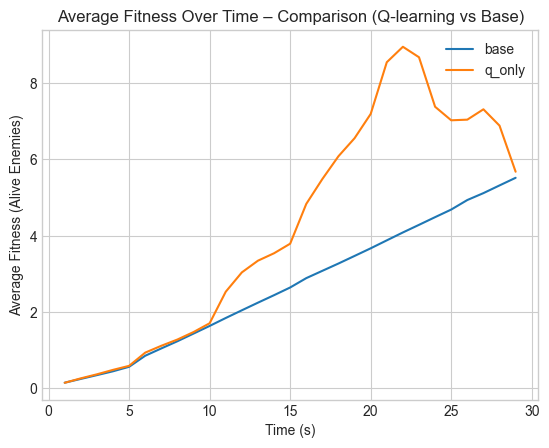

In [20]:

subset = df_all[
    (df_all["config"].isin(["q_only", "base"])) &
    (df_all["log_type"] == "wave_snapshot") 
    # (df_all['repetition'] == 1)
]

# group by both config and time
grouped = subset.groupby(["config", "time"])["mean_fitness_alive"].mean().reset_index()

# plot both
for cfg in ["base", "q_only"]:
    df_cfg = grouped[grouped["config"] == cfg]
    plt.plot(df_cfg["time"], df_cfg["mean_fitness_alive"], label=cfg)

plt.title("Average Fitness Over Time – Comparison (Q-learning vs Base)")
plt.xlabel("Time (s)")
plt.ylabel("Average Fitness (Alive Enemies)")
plt.legend()
plt.show()

### Across Wave plots

All configs: wave vs fitness

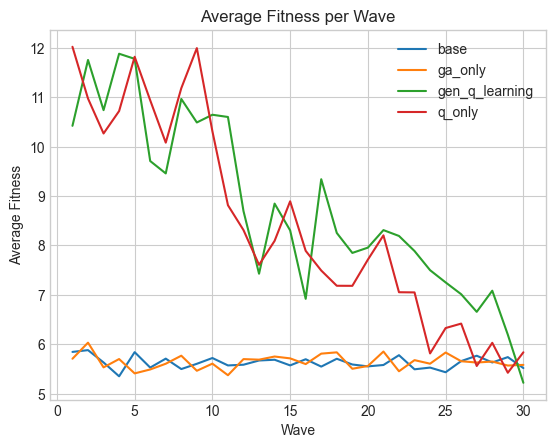

In [21]:
# subset = df_all[(df_all["repetition"] == 1)]
wave_avg = df_all.groupby(["config", "wave"])["fitness"].mean().reset_index()
for cfg in wave_avg["config"].unique():
    plt.plot(
        wave_avg[wave_avg["config"] == cfg]["wave"],
        wave_avg[wave_avg["config"] == cfg]["fitness"],
        label=cfg
    )
plt.title("Average Fitness per Wave")
plt.xlabel("Wave")
plt.ylabel("Average Fitness")
plt.legend()
plt.show()

### Curiosities

wave vs damage

120


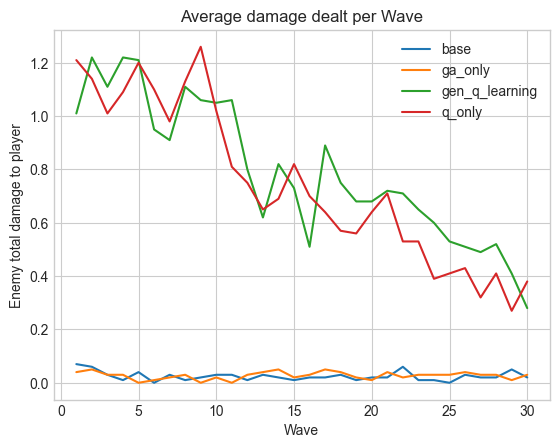

In [22]:
wave_avg = df_all.groupby(["config", "wave"])["damage"].mean().reset_index()
print(len(wave_avg))
for cfg in wave_avg["config"].unique():
    plt.plot(
        wave_avg[wave_avg["config"] == cfg]["wave"],
        wave_avg[wave_avg["config"] == cfg]["damage"],
        label=cfg
    )
plt.title("Average damage dealt per Wave")
plt.xlabel("Wave")
plt.ylabel("Enemy total damage to player")
plt.legend()
plt.show()

wave vs dodging

120


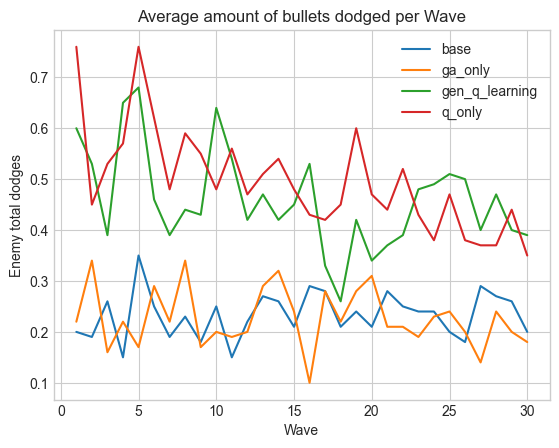

In [23]:
wave_avg = df_all.groupby(["config", "wave"])["dodged_bullets"].mean().reset_index()
print(len(wave_avg))
for cfg in wave_avg["config"].unique():
    plt.plot(
        wave_avg[wave_avg["config"] == cfg]["wave"],
        wave_avg[wave_avg["config"] == cfg]["dodged_bullets"],
        label=cfg
    )
plt.title("Average amount of bullets dodged per Wave")
plt.xlabel("Wave")
plt.ylabel("Enemy total dodges")
plt.legend()
plt.show()